# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import itertools

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy




### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q=pudozh" + "&units=imperial"

weather_response = requests.get(query_url)

data = weather_response.json()

print(data['dt']
     )

1684874969


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
  


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities, start=600):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    weather_response = requests.get(city_url)
    #turn result into json
    weather_data = weather_response.json()
    # Parse the JSON and retrieve data
    city_weather = weather_data['weather']
    #print(weather_data['weather'])
    
    try:
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_data['coord']['lat']
        print(city_lat)
        city_lng = weather_data['coord']['lon']
        print(city_lng)
        city_max_temp = weather_data['main']['temp_max']
        print(city_max_temp)
        city_humidity = weather_data['main']['humidity']
        print(city_humidity)
        city_clouds = weather_data['clouds']['all']
        print(city_clouds)
        city_wind = weather_data['wind']['speed']
        print(city_wind)
        city_country = weather_data['sys']['country']
        print(city_country)
        city_date = weather_data['dt']
        print(city_date)
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    except:
        print("City not found. Skipping...")
 

    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 2 | saipan
15.1355
145.701
81.3
100
75
26.46
MP
1684874970
Processing Record 1 of Set 2 | puerto natales
-51.7236
-72.4875
39.65
75
40
4.61
CL
1684874970
Processing Record 2 of Set 2 | bozkurt
41.9577
34.0109
58.71
94
90
3.06
TR
1684874970
Processing Record 3 of Set 2 | edinburgh of the seven seas
-37.0676
-12.3116
57.42
67
52
30.2
SH
1684874970
Processing Record 4 of Set 2 | bulayevo
54.9056
70.4439
57.07
55
49
2.84
KZ
1684874971
Processing Record 5 of Set 2 | kailua-kona
19.6406
-155.9956
80.28
84
100
9.22
US
1684874933
Processing Record 6 of Set 2 | ribeira grande
38.5167
-28.7
66.6
72
40
10.36
PT
1684874971
Processing Record 7 of Set 2 | flying fish cove
-10.4217
105.6791
76.68
88
40
9.22
CX
1684874870
Processing Record 8 of Set 2 | bethel
41.3712
-73.414
71.37
56
0
9.22
US
1684874811
Processing Record 9 of Set 2 | invercargill
-46.4
168.35
45.28
77
81
9.31
NZ
1684874971
Processing Record 10 of S

KeyboardInterrupt: 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          44
Lat           44
Lng           44
Max Temp      44
Humidity      44
Cloudiness    44
Wind Speed    44
Country       44
Date          44
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saipan,15.1355,145.7010,81.30,100,75,26.46,MP,1684874970
1,puerto natales,-51.7236,-72.4875,39.65,75,40,4.61,CL,1684874970
2,bozkurt,41.9577,34.0109,58.71,94,90,3.06,TR,1684874970
3,edinburgh of the seven seas,-37.0676,-12.3116,57.42,67,52,30.20,SH,1684874970
4,bulayevo,54.9056,70.4439,57.07,55,49,2.84,KZ,1684874971


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.1355,145.7010,81.30,100,75,26.46,MP,1684874970
1,puerto natales,-51.7236,-72.4875,39.65,75,40,4.61,CL,1684874970
2,bozkurt,41.9577,34.0109,58.71,94,90,3.06,TR,1684874970
3,edinburgh of the seven seas,-37.0676,-12.3116,57.42,67,52,30.20,SH,1684874970
4,bulayevo,54.9056,70.4439,57.07,55,49,2.84,KZ,1684874971


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

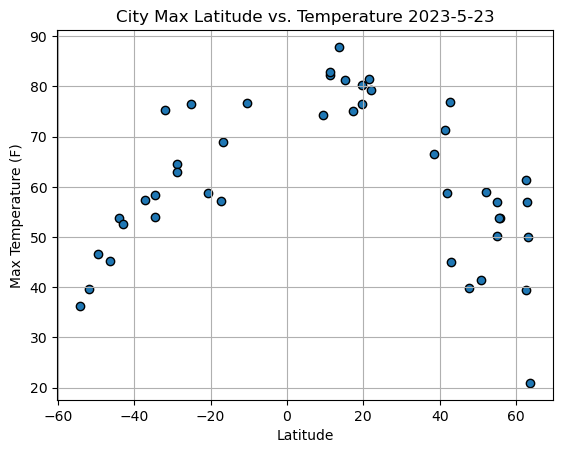

In [9]:
# Build scatter plot for latitude vs. temperature
temp_by_lat = city_data_df[["Lat", "Max Temp"]].copy()
plt.scatter(temp_by_lat['Lat'], temp_by_lat['Max Temp'], marker="o",  edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

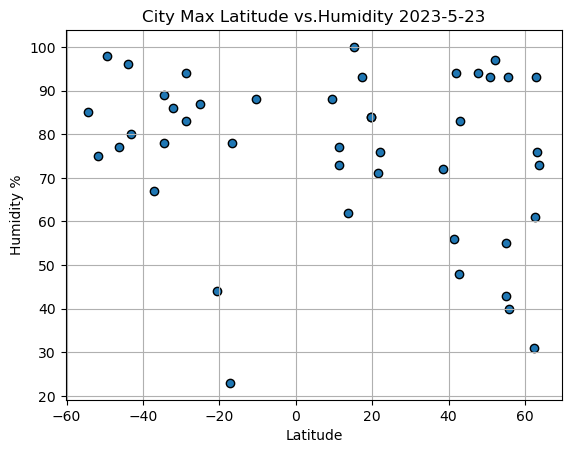

In [10]:
# Build the scatter plots for latitude vs. humidity
humidity_by_lat = city_data_df[["Lat", "Humidity"]].copy()
plt.scatter(humidity_by_lat['Lat'], humidity_by_lat["Humidity"], marker="o",  edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs.Humidity 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

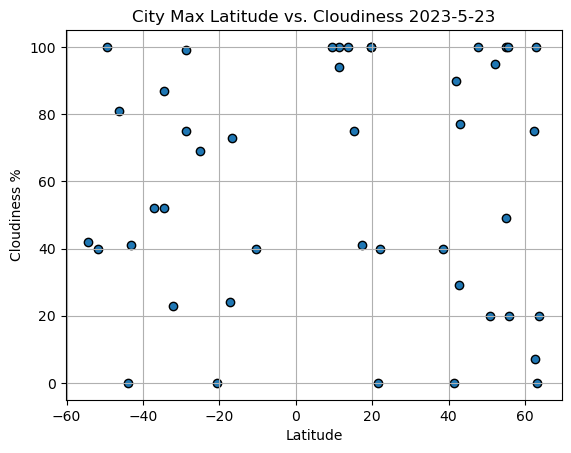

In [11]:
# Build the scatter plots for latitude vs. cloudiness
clouds_by_lat = city_data_df[["Lat", "Cloudiness"]].copy()
plt.scatter(clouds_by_lat['Lat'], clouds_by_lat["Cloudiness"], marker="o",  edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

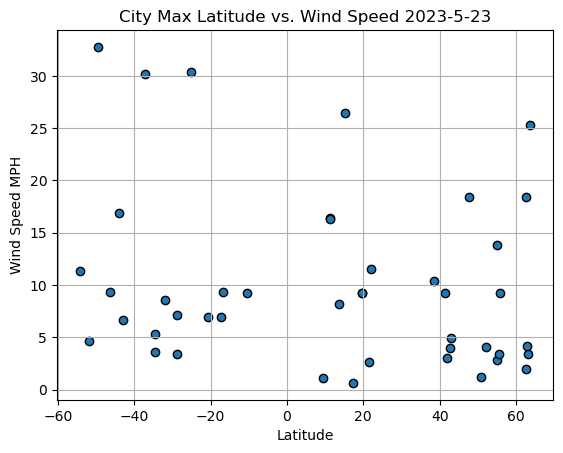

In [12]:
# Build the scatter plots for latitude vs. wind speed
wind_by_lat = city_data_df[["Lat", "Wind Speed"]].copy()
plt.scatter(wind_by_lat['Lat'], wind_by_lat["Wind Speed"], marker="o",  edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed MPH')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.1355,145.7010,81.30,100,75,26.46,MP,1684874970
2,bozkurt,41.9577,34.0109,58.71,94,90,3.06,TR,1684874970
4,bulayevo,54.9056,70.4439,57.07,55,49,2.84,KZ,1684874971
5,kailua-kona,19.6406,-155.9956,80.28,84,100,9.22,US,1684874933
6,ribeira grande,38.5167,-28.7000,66.60,72,40,10.36,PT,1684874971


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,39.65,75,40,4.61,CL,1684874970
3,edinburgh of the seven seas,-37.0676,-12.3116,57.42,67,52,30.20,SH,1684874970
7,flying fish cove,-10.4217,105.6791,76.68,88,40,9.22,CX,1684874870
9,invercargill,-46.4000,168.3500,45.28,77,81,9.31,NZ,1684874971
13,bredasdorp,-34.5322,20.0403,54.07,89,87,3.56,ZA,1684874808


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6885398675734925


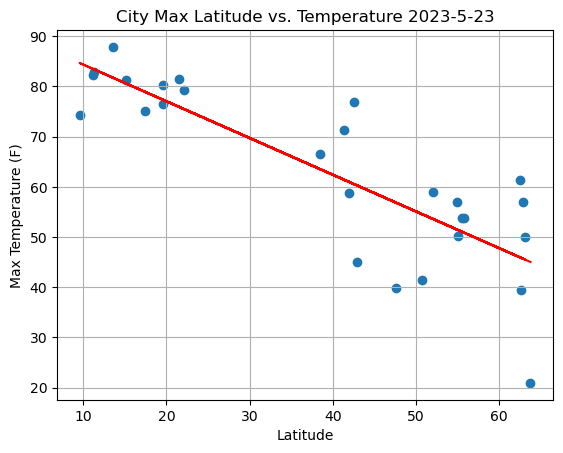

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()


The r-squared is: 0.6703402267370404


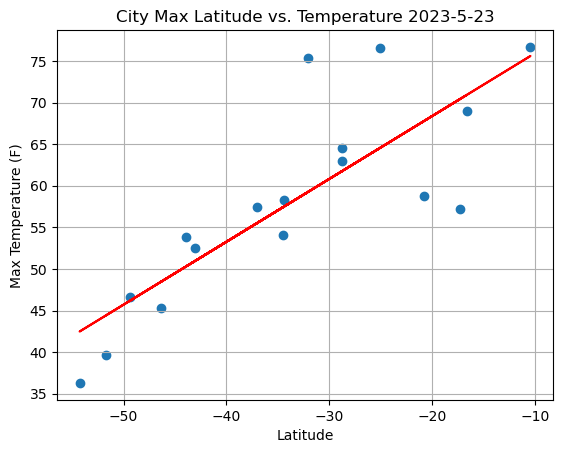

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.08371248393128898


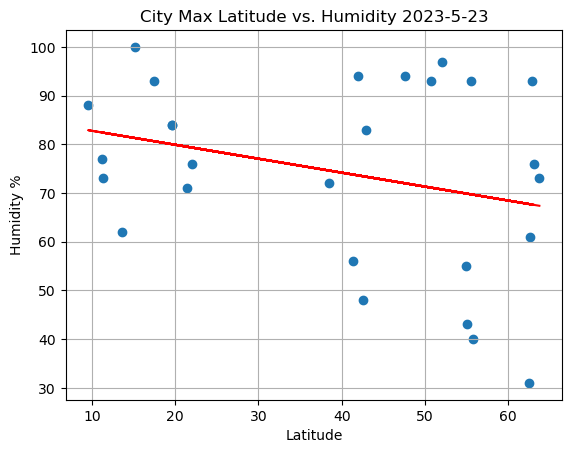

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.13935207963043286


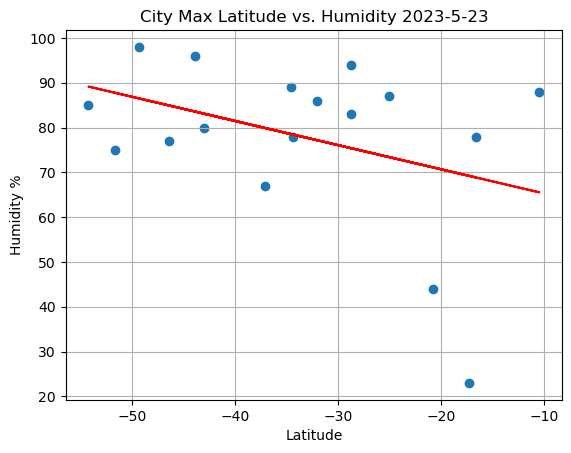

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.09547447774281341


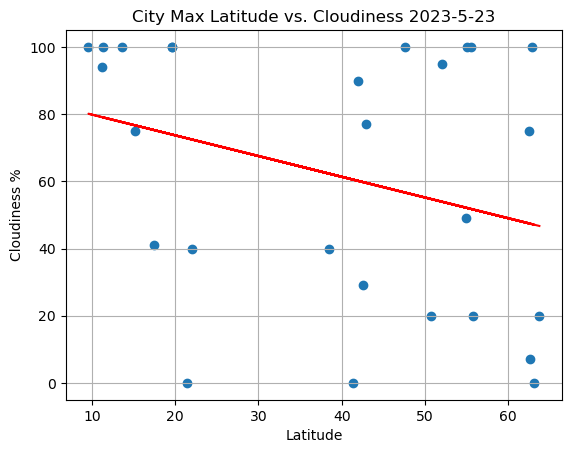

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.011648767049093125


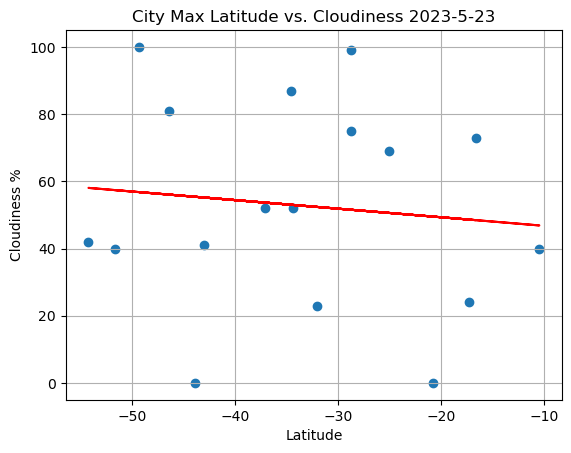

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.009485990963172495


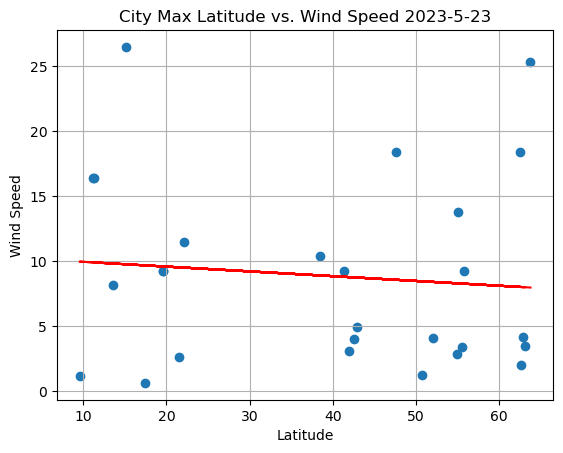

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.03255747063708715


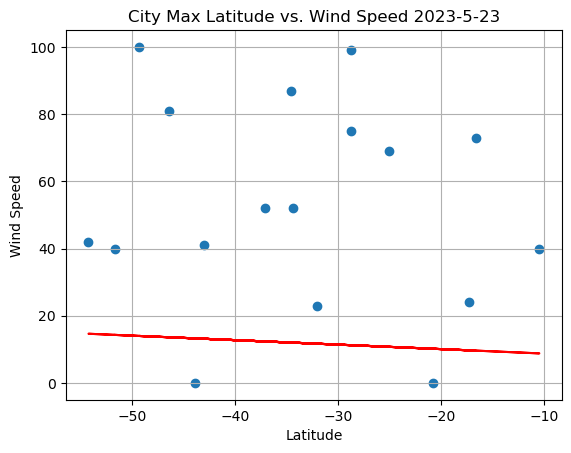

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE